![Python Logo](https://miro.medium.com/v2/resize:fit:828/format:webp/1*m0H6-tUbW6grMlezlb52yw.png)

# Proyecto - Procesamiento de datos del SITP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from scipy.stats import chi2_contingency
import seaborn as sns
import os

from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.graph_objs as go
import plotly.express as px

In [ ]:
# Parametros
realizar_analisis_cramer = False
pd.set_option('display.float_format', lambda x: '%.2f' % x)
os.environ["OMP_NUM_THREADS"] = '1'
sns.set_theme()


## 1. Carga y descripción de los dataframe

In [ ]:
infracciones_df = pd.read_excel(io="BaseSITP.xlsx", sheet_name="Infracciones")
km_df = pd.read_excel(io="BaseSITP.xlsx", sheet_name="km")

infracciones_df["Hora Novedad"] = pd.to_datetime(infracciones_df["Hora Novedad"].astype(str))
infracciones_df

Id  de la novedad         Área Empresa Tipo de novedad Fecha Novedad  \
0                 7293580  OPERACIONES       A         I5023-3    2021-04-03   
1                 7293592  OPERACIONES       A         I5023-3    2021-04-03   
2                 7294180    SEGURIDAD       A           I8003    2021-04-06   
3                 7296414    SEGURIDAD       B           I6019    2021-04-22   
4                 7297202    SEGURIDAD       C           I8003    2021-04-30   
...                   ...          ...     ...             ...           ...   
114119            7277482    VEHÍCULOS       F           I5006    2020-12-17   
114120            7277442    VEHÍCULOS       F           I5006    2020-12-17   
114121            7277446    VEHÍCULOS       F           I5006    2020-12-17   
114122            7277460    VEHÍCULOS       F           I5006    2020-12-17   
114123            7275464    VEHÍCULOS       A           I5006    2020-12-05   

              Hora Novedad Tipo de concesión  \
0      2023-05-21 00:00:00             ZONAL   
1      2023-05-21 00:00:00             ZONAL   
2      2023-05-21 00:00:00             ZONAL   
3      2023-05-21 00:00:00             ZONAL   
4      2023-05-21 00:00:00             ZONAL   
...                    ...               ...   
114119 2023-05-21 05:28:00             ZONAL   
114120 2023-05-21 04:53:00             ZONAL   
114121 2023-05-21 05:19:00             ZONAL   
114122 2023-05-21 05:35:00             ZONAL   
114123 2023-05-21 04:38:00             ZONAL   

                           Mecanismo de observación    Ruta  \
0                             Personal Transmilenio  A-1282   
1       Personal de Interventoría CENTRO DE CONTROL     NaN   
2                                 Queja del usuario   A-230   
3                     Personal Interventoría en Vía  B-1138   
4       Personal de Interventoría CENTRO DE CONTROL    C-66   
...                                             ...     ...   
114119                Personal Interventoría en Vía   F-409   
114120                Personal Interventoría en Vía   F-409   
114121                Personal Interventoría en Vía   F-409   
114122                Personal Interventoría en Vía   F-409   
114123                Personal Interventoría en Vía   A-411   

                            Dirección                              Ubicación  \
0               Carrera 11 calle 146B         4.739498899999983, -74.0821979   
1       Calle 115 Sur Carrera 5H Este                   4.487013, -74.106377   
2             Carrera 7 con Calle 127  4.702072999999993, -74.02867169999998   
3                 Av NQS con calle 10  4.610233599999969, -74.09485889999999   
4         Carrera 33 con Calle 43 sur                   4.542959, -74.079041   
...                               ...                                    ...   
114119  carrera 15 este # 45B-50 sur.                   4.534609, -74.083706   
114120  carrera 15 este # 45B-50 sur.                   4.534609, -74.083706   
114121  carrera 15 este # 45B-50 sur.                   4.534609, -74.083706   
114122  carrera 15 este # 45B-50 sur.                   4.534609, -74.083706   
114123       carrera 19D # 64-80 sur.                   4.561231, -74.145055   

       Vehículo Conductor  Puntos Unidad  de medida  \
0           A-1       A-1      10            Puntos   
1           A-2       A-2      10            Puntos   
2           A-3       A-3      30            Puntos   
3           B-4       B-4      15            Puntos   
4           C-5       C-5      30            Puntos   
...         ...       ...     ...               ...   
114119   F-6180       NaN      10            Puntos   
114120   F-2449       NaN      10            Puntos   
114121    F-336       NaN      10            Puntos   
114122   F-4784       NaN      10            Puntos   
114123   A-5402       NaN      10            Puntos   

                                              Descripción  
0       No cumplir con los line

###  1.1. Perfilado Dataframe Infracciones

In [ ]:
reporte = ProfileReport(infracciones_df)
reporte

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reporte.to_file("infracciones profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
%matplotlib inline

In [ ]:
variable = "Área"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0    VEHÍCULOS   47826       41.91
1  OPERACIONES   36774       32.22
2    SEGURIDAD   29524       25.87

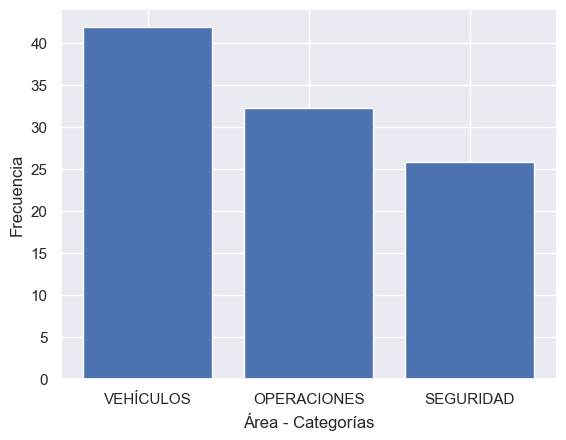

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
variable = "Empresa"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0         A   31492       27.59
1         D   16508       14.46
2         G   14362       12.58
3         J   12896       11.30
4         F   12107       10.61
5         E    9180        8.04
6         C    6590        5.77
7         B    6394        5.60
8         K    3431        3.01
9         L     923        0.81

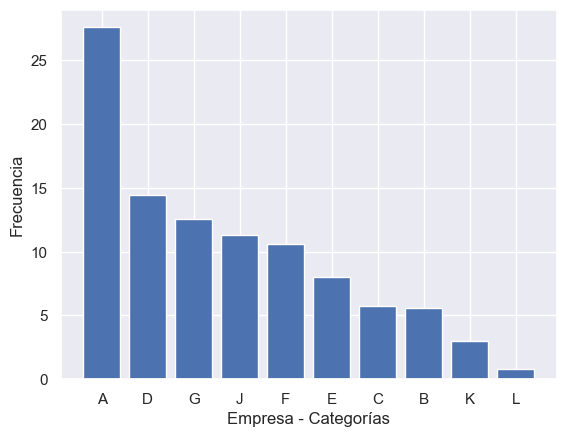

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
variable = "Tipo de novedad"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0     I5025   27199       23.83
1     I5006   14636       12.82
2     I6019    9738        8.53
3   I5003-2    9263        8.12
4     I8024    7498        6.57
5   I5003-4    6617        5.80
6     I6026    4159        3.64
7     I5022    3908        3.42
8     I6012    2774        2.43
9   I6019-2    2368        2.07

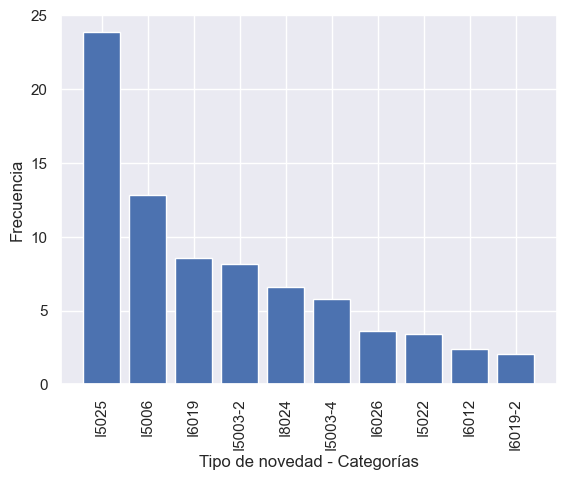

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Tipo de concesión"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0          ZONAL  113883       99.79
1  ZONAL UF 2019     241        0.21

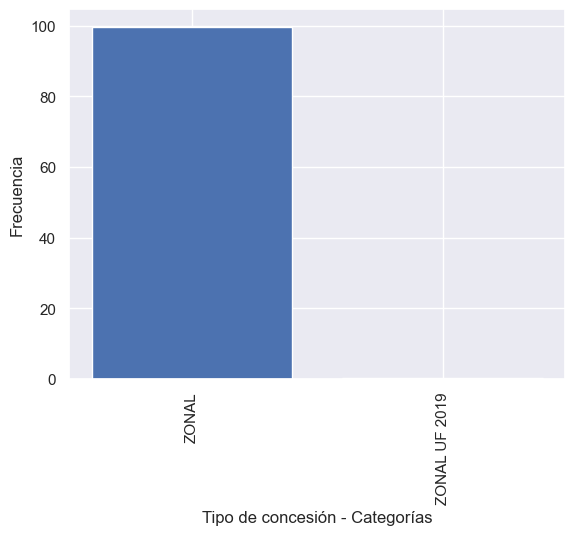

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Mecanismo de observación"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0                Personal Interventoría en Vía   79268       69.46
1  Personal de Interventoría CENTRO DE CONTROL   29209       25.59
2                            Centro de control    2608        2.29
3                        Personal Transmilenio    1820        1.59
4                              Personal en via    1216        1.07
5                            Queja del usuario       3        0.00

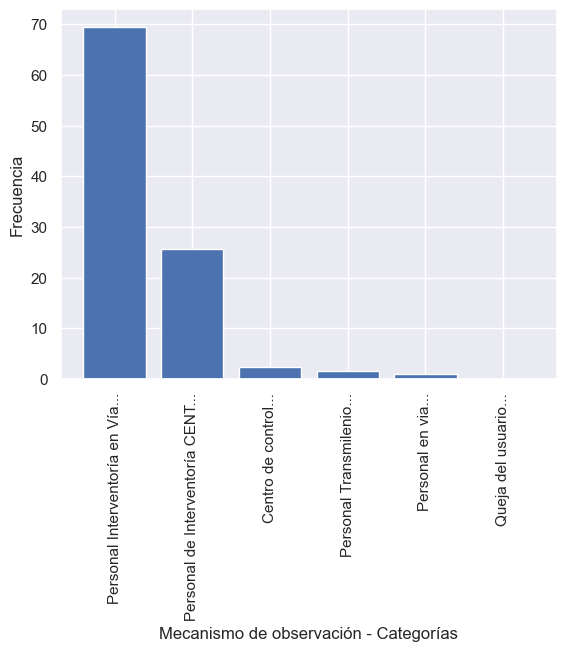

In [ ]:
plt.bar(conteo["Categoría"].str[0:30] + "...", conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Ruta"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0     A-411    9248       11.33
1     G-460    3807        4.66
2     D-373    3734        4.58
3     F-409    3280        4.02
4     B-458    2160        2.65
5     J-138    2076        2.54
6     E-137    1605        1.97
7     C-420    1569        1.92
8     K-422     785        0.96
9      A-78     582        0.71

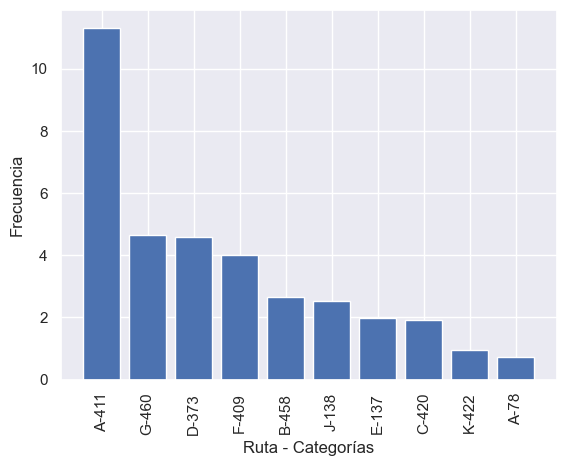

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Dirección"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0              calle 191 # 45-11    2132        2.62
1             calle 191 # 45-11.    2092        2.57
2  carrera 15 este # 45B-50 sur.    1773        2.18
3        Calle 94A sur # 87A-65.    1245        1.53
4             calle 90 # 95G-02.    1180        1.45
5       carrera 19D # 64-80 sur.    1006        1.24
6             Av. Cali # 13C-51.     959        1.18
7          calle 73 sur # 95-05.     924        1.14
8        carrera 19D # 64-80 sur     880        1.08
9   carrera 15 este # 45B-50 sur     811        1.00

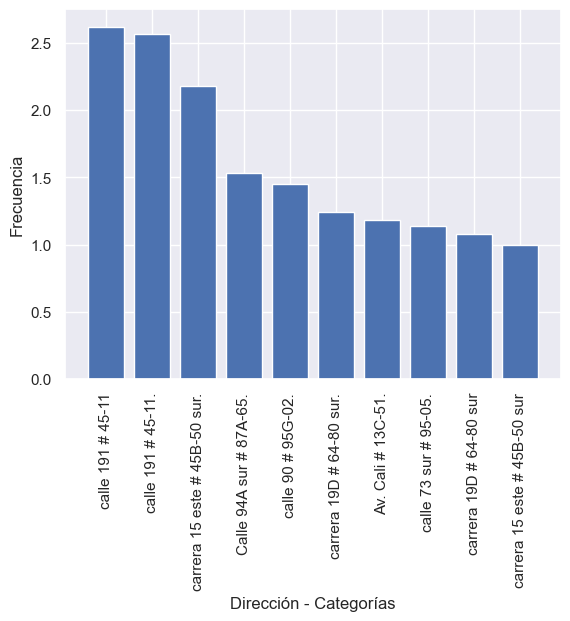

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Ubicación"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0         4.767781600000016, -74.0243333    4338        5.34
1                   4.534609, -74.083706    2619        3.22
2                   4.561231, -74.145055    1933        2.38
3         4.615608600000014, -74.2161426    1853        2.28
4         4.630067300000009, -74.2033165    1624        2.00
5  4.717960599999991, -74.10271980000002    1570        1.93
6  4.656175100000026, -74.14097869999999    1173        1.44
7  4.718063200000007, -74.14226279999998    1025        1.26
8                   4.524613, -74.125804    1001        1.23
9                   4.585245, -74.081498     975        1.20

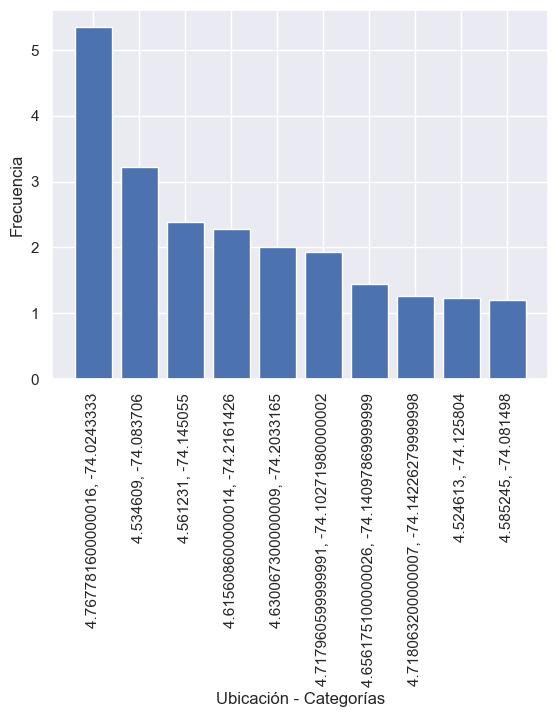

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Vehículo"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0     G-767     499        0.61
1    F-1730     303        0.37
2    A-1461     154        0.19
3    B-4675      86        0.11
4     A-347      49        0.06
5    F-4877      43        0.05
6     A-528      43        0.05
7    A-4557      43        0.05
8    A-5439      43        0.05
9     A-639      42        0.05

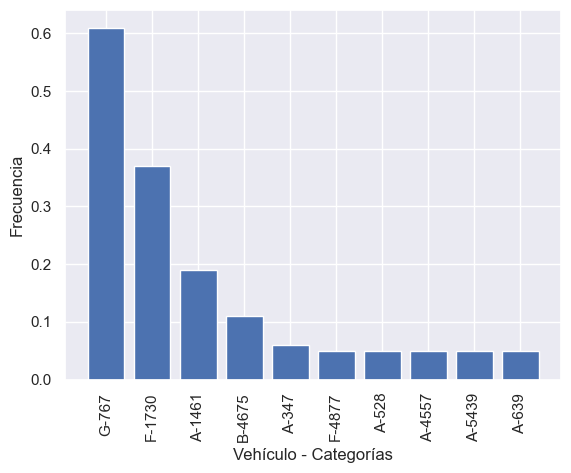

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Conductor"

conteo = pd.DataFrame(infracciones_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0    A-3290      22        0.05
1     A-859      22        0.05
2    E-6801      19        0.04
3    A-7450      19        0.04
4    E-2583      18        0.04
5     J-293      18        0.04
6    A-4732      18        0.04
7    E-6867      18        0.04
8    J-1238      18        0.04
9    C-3451      18        0.04

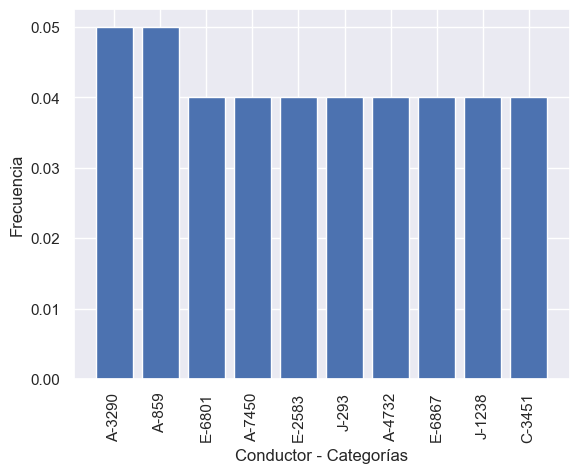

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Puntos"

conteo = pd.DataFrame(infracciones_df[variable].astype(str).value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0        10   50767       44.48
1        15   49764       43.61
2        30   13593       11.91

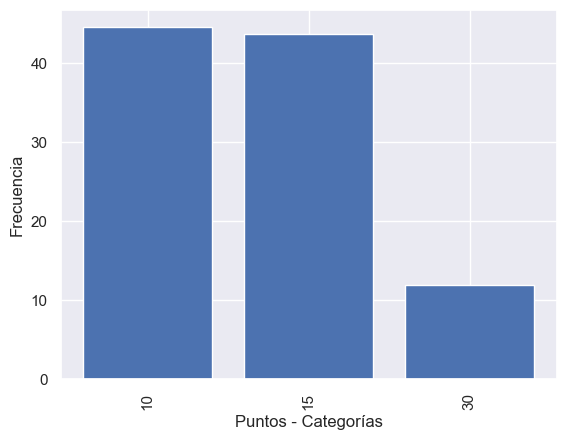

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Unidad  de medida"

conteo = pd.DataFrame(infracciones_df[variable].astype(str).value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0    Puntos  114124      100.00

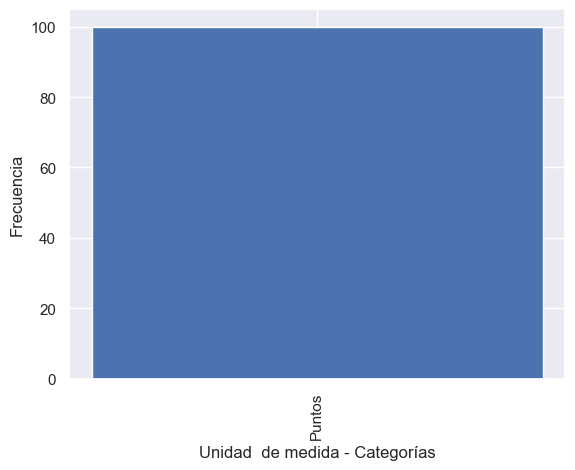

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Descripción"

conteo = pd.DataFrame(infracciones_df[variable].astype(str).value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0  Tiempo de atención en vía (cuando se supera el...   27199       23.83
1  Vehículo desaseado en su exterior o interior a...   14636       12.82
2  No seguir o desconocer las instrucciones dadas...    9738        8.53
3  Rayones, abolladuras, carencia de elementos, e...    9263        8.12
4                      No aplicar manejo preventivo.    7498        6.57
5  Testigos encendidos con alarma de advertencia ...    6617        5.80
6  Transitar con exceso de velocidad en tramos vi...    4159        3.64
7  Fugas de combustible, lubricantes o fluidos as...    3908        3.42
8  Manipular, tener a la mano o usar equipos elec...    2774        2.43
9  Omitir o realizar de forma indebida el PARE\n\...    2368        2.07

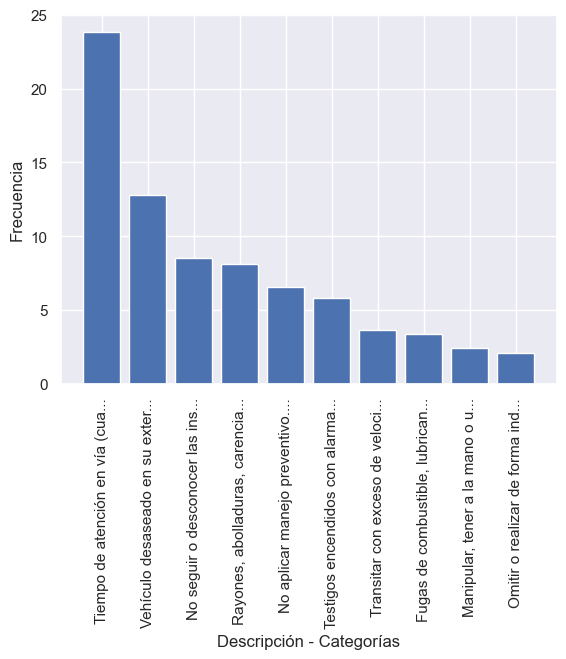

In [ ]:
plt.bar(conteo["Categoría"].str[0:30] + "...", conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
conteo_fecha = pd.DataFrame(infracciones_df.groupby(infracciones_df["Fecha Novedad"].dt.month).size())
conteo_fecha["Frecuencia"] = (conteo_fecha[0] / conteo_fecha[0].sum() * 100).round(2)
conteo_fecha.reset_index(inplace=True)
conteo_fecha.columns = ["Mes", "Conteo", "Frecuencia"]
conteo_fecha

Mes  Conteo  Frecuencia
0     1   13499       11.83
1     2   13213       11.58
2     3   13078       11.46
3     4   10184        8.92
4     5    7766        6.80
5     6    5497        4.82
6     7    6121        5.36
7     8    6035        5.29
8     9    9078        7.95
9    10   11635       10.20
10   11    9265        8.12
11   12    8753        7.67

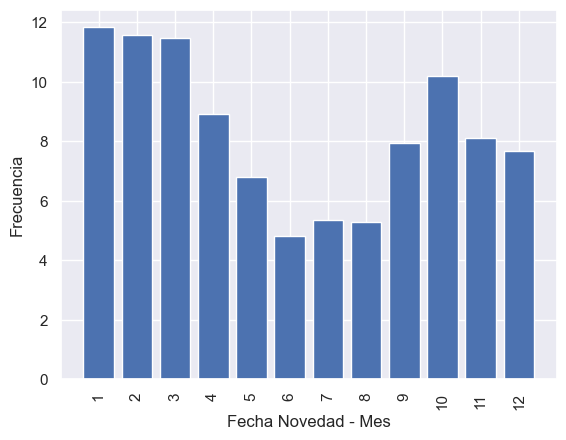

In [ ]:
plt.bar(conteo_fecha["Mes"], conteo_fecha["Frecuencia"])
plt.xticks(conteo_fecha["Mes"].values)
plt.xlabel(f"Fecha Novedad - Mes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
conteo_fecha = pd.DataFrame(infracciones_df.groupby(infracciones_df["Fecha Novedad"].dt.day).size())
conteo_fecha["Frecuencia"] = (conteo_fecha[0] / conteo_fecha[0].sum() * 100).round(2)
conteo_fecha.reset_index(inplace=True)
conteo_fecha.columns = ["Día", "Conteo", "Frecuencia"]
conteo_fecha.head(16)

Día  Conteo  Frecuencia
0     1    3081        2.70
1     2    3616        3.17
2     3    3677        3.22
3     4    3855        3.38
4     5    3851        3.37
5     6    3695        3.24
6     7    3563        3.12
7     8    3799        3.33
8     9    3786        3.32
9    10    3637        3.19
10   11    3948        3.46
11   12    3924        3.44
12   13    3922        3.44
13   14    3992        3.50
14   15    4003        3.51
15   16    4016        3.52

In [ ]:
conteo_fecha.tail(15)

Día  Conteo  Frecuencia
16   17    3940        3.45
17   18    4108        3.60
18   19    3906        3.42
19   20    3694        3.24
20   21    3556        3.12
21   22    3772        3.31
22   23    3730        3.27
23   24    3526        3.09
24   25    3733        3.27
25   26    3797        3.33
26   27    3642        3.19
27   28    3557        3.12
28   29    3451        3.02
29   30    3373        2.96
30   31    1974        1.73

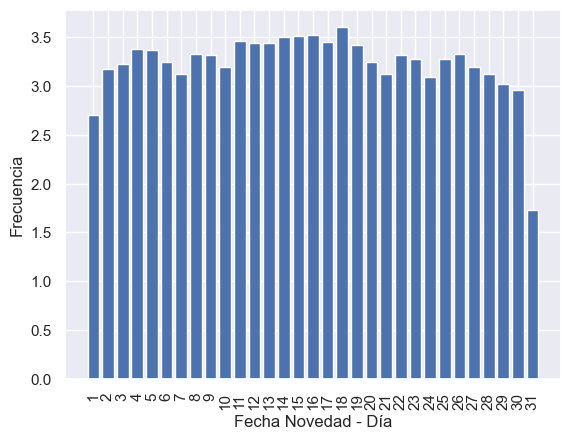

In [ ]:
plt.bar(conteo_fecha["Día"], conteo_fecha["Frecuencia"])
plt.xticks(conteo_fecha["Día"].values)
plt.xlabel(f"Fecha Novedad - Día")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
conteo_fecha = pd.DataFrame(infracciones_df.groupby(infracciones_df["Fecha Novedad"].dt.year).size())
conteo_fecha["Frecuencia"] = (conteo_fecha[0] / conteo_fecha[0].sum() * 100).round(2)
conteo_fecha.reset_index(inplace=True)
conteo_fecha.columns = ["Año", "Conteo", "Frecuencia"]
conteo_fecha

Año  Conteo  Frecuencia
0  2019   65650       57.53
1  2020   35864       31.43
2  2021   12610       11.05

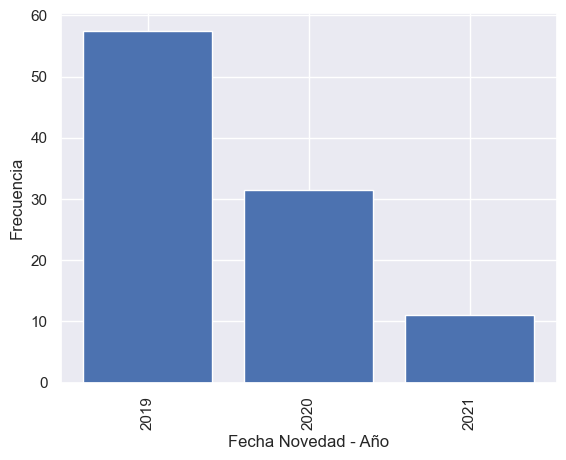

In [ ]:
plt.bar(conteo_fecha["Año"], conteo_fecha["Frecuencia"])
plt.xticks(conteo_fecha["Año"].values)
plt.xlabel(f"Fecha Novedad - Año")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
conteo_fecha = pd.DataFrame(infracciones_df.groupby(infracciones_df["Hora Novedad"].dt.hour).size())
conteo_fecha["Frecuencia"] = (conteo_fecha[0] / conteo_fecha[0].sum() * 100).round(2)
conteo_fecha.reset_index(inplace=True)
conteo_fecha.columns = ["Hora", "Conteo", "Frecuencia"]
conteo_fecha.head(13)

Hora  Conteo  Frecuencia
0      0   34872       30.56
1      1      82        0.07
2      2      61        0.05
3      3     468        0.41
4      4    1285        1.13
5      5    1673        1.47
6      6    2534        2.22
7      7    3351        2.94
8      8    3709        3.25
9      9    4569        4.00
10    10    4446        3.90
11    11   12353       10.82
12    12    3165        2.77

In [ ]:
conteo_fecha.tail(11)

Hora  Conteo  Frecuencia
13    13    2716        2.38
14    14    3370        2.95
15    15    4052        3.55
16    16    3369        2.95
17    17    4251        3.72
18    18    2493        2.18
19    19   15622       13.69
20    20    2035        1.78
21    21    1392        1.22
22    22    1188        1.04
23    23    1068        0.94

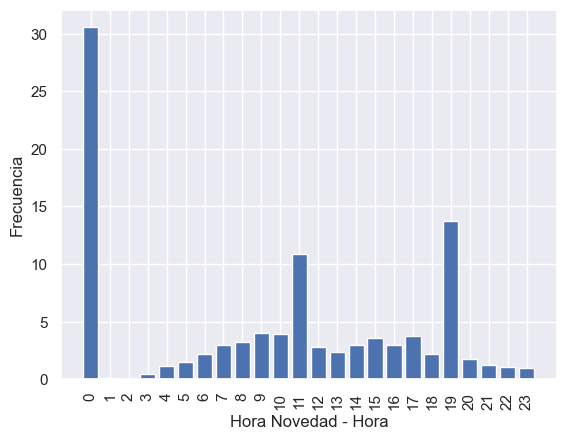

In [ ]:
plt.bar(conteo_fecha["Hora"], conteo_fecha["Frecuencia"])
plt.xticks(conteo_fecha["Hora"].values)
plt.xlabel(f"Hora Novedad - Hora")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#  0   Id  de la novedad         114124 non-null  int64         
#  1   Área                      114124 non-null  object        
#  2   Empresa                   114124 non-null  object        
#  3   Tipo de novedad           114124 non-null  object        
#  4   Fecha Novedad             114124 non-null  datetime64[ns]
#  5   Hora Novedad              114124 non-null  datetime64[ns]
#  6   Tipo de concesión         114124 non-null  object        
#  7   Mecanismo de observación  114124 non-null  object        
#  8   Ruta                      81614 non-null   object        
#  9   Dirección                 81297 non-null   object        
#  10  Ubicación                 81297 non-null   object        
#  11  Vehículo                  81452 non-null   object        
#  12  Conductor                 48661 non-null   object        
#  13  Puntos                    114124 non-null  int64         
#  14  Unidad  de medida         114124 non-null  object        
#  15  Descripción               114124 non-null  object     

infracciones_df["Área"] = infracciones_df["Área"].astype("category")
infracciones_df["Empresa"] = infracciones_df["Empresa"].astype("category")
infracciones_df["Tipo de novedad"] = infracciones_df["Tipo de novedad"].astype("category")
infracciones_df["Tipo de concesión"] = infracciones_df["Tipo de concesión"].astype("category")
infracciones_df["Mecanismo de observación"] = infracciones_df["Mecanismo de observación"].astype("category")
infracciones_df["Ruta"] = infracciones_df["Ruta"].astype("category")
infracciones_df["Dirección"] = infracciones_df["Dirección"].astype("category")
infracciones_df["Ubicación"] = infracciones_df["Ubicación"].astype("category")
infracciones_df["Vehículo"] = infracciones_df["Vehículo"].astype("category")
infracciones_df["Conductor"] = infracciones_df["Conductor"].astype("category")
infracciones_df["Unidad  de medida"] = infracciones_df["Unidad  de medida"].astype("category")
infracciones_df["Descripción"] = infracciones_df["Descripción"].astype("category")

infracciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114124 entries, 0 to 114123
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Id  de la novedad         114124 non-null  int64         
 1   Área                      114124 non-null  category      
 2   Empresa                   114124 non-null  category      
 3   Tipo de novedad           114124 non-null  category      
 4   Fecha Novedad             114124 non-null  datetime64[ns]
 5   Hora Novedad              114124 non-null  datetime64[ns]
 6   Tipo de concesión         114124 non-null  category      
 7   Mecanismo de observación  114124 non-null  category      
 8   Ruta                      81614 non-null   category      
 9   Dirección                 81297 non-null   category      
 10  Ubicación                 81297 non-null   category      
 11  Vehículo                  81452 non-null   category      
 12  Co

In [ ]:
if realizar_analisis_cramer == True:

  def cramers_v(x, y):
      '''
      Returns cramers_v for 2 categorical features
      '''
      confusion_matrix = pd.crosstab(x,y)
      chi2 = chi2_contingency(confusion_matrix)[0]
      n = confusion_matrix.sum().sum()
      phi2 = chi2/n
      r,k = confusion_matrix.shape
      phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
      rcorr = r-((r-1)**2)/(n-1)
      kcorr = k-((k-1)**2)/(n-1)
      return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

  # create a correlation matrix for the categorical variables

  infracciones_df_no_na = infracciones_df.dropna()
  categorical_cols = infracciones_df_no_na.select_dtypes(include=['category']).columns

  rows= []

  for var1 in categorical_cols:
    col = []
    for var2 in categorical_cols :
      cramers =cramers_v(infracciones_df_no_na[var1], infracciones_df_no_na[var2]) # Cramer's V test
      col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
    
  cramers_results = np.array(rows)
  corr_matrix = pd.DataFrame(cramers_results, columns = categorical_cols, index =categorical_cols)
  corr_matrix

In [ ]:
if realizar_analisis_cramer == True:
    sb.set(rc={"figure.figsize":(20,10)})
    sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
    plt.savefig('Corr Matrix.png')

### 1.2. Perfilado Dataframe KM

In [ ]:
reporte = ProfileReport(km_df)
reporte

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reporte.to_file("km_profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
conteo_fecha = pd.DataFrame(km_df.groupby(km_df["Fecha"].dt.year).size())
conteo_fecha["Frecuencia"] = (conteo_fecha[0] / conteo_fecha[0].sum() * 100).round(2)
conteo_fecha.reset_index(inplace=True)
conteo_fecha.columns = ["Año", "Conteo", "Frecuencia"]
conteo_fecha

Año  Conteo  Frecuencia
0  2019   56810       25.34
1  2020  110412       49.24
2  2021   57013       25.43

In [ ]:
plt.style.use('default')

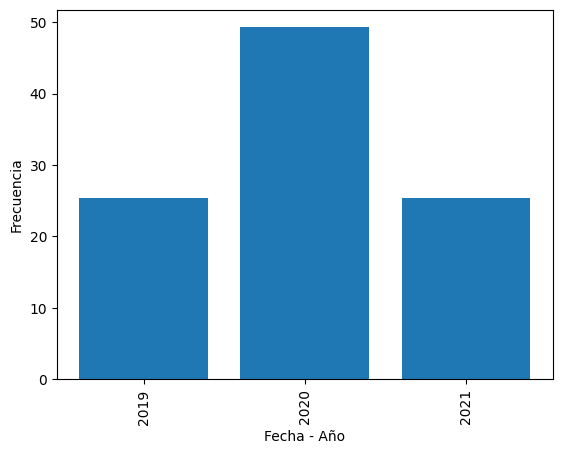

In [ ]:
plt.bar(conteo_fecha["Año"], conteo_fecha["Frecuencia"])
plt.xticks(conteo_fecha["Año"].values)
plt.xlabel(f"Fecha - Año")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
conteo_fecha = pd.DataFrame(km_df.groupby(km_df["Fecha"].dt.month).size())
conteo_fecha["Frecuencia"] = (conteo_fecha[0] / conteo_fecha[0].sum() * 100).round(2)
conteo_fecha.reset_index(inplace=True)
conteo_fecha.columns = ["Mes", "Conteo", "Frecuencia"]
conteo_fecha

Mes  Conteo  Frecuencia
0     1   19236        8.58
1     2   17405        7.76
2     3   18905        8.43
3     4   18561        8.28
4     5   19466        8.68
5     6   18399        8.21
6     7   18943        8.45
7     8   18987        8.47
8     9   18500        8.25
9    10   19216        8.57
10   11   18146        8.09
11   12   18471        8.24

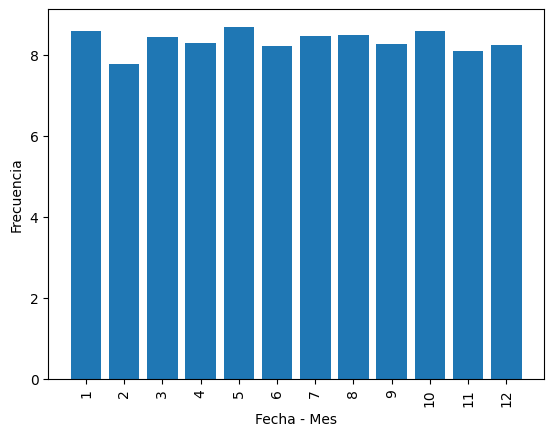

In [ ]:
plt.bar(conteo_fecha["Mes"], conteo_fecha["Frecuencia"])
plt.xticks(conteo_fecha["Mes"].values)
plt.xlabel(f"Fecha - Mes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
conteo_fecha = pd.DataFrame(km_df.groupby(km_df["Fecha"].dt.day).size())
conteo_fecha["Frecuencia"] = (conteo_fecha[0] / conteo_fecha[0].sum() * 100).round(2)
conteo_fecha.reset_index(inplace=True)
conteo_fecha.columns = ["Día", "Conteo", "Frecuencia"]
conteo_fecha.head(16)

Día  Conteo  Frecuencia
0     1    7256        3.24
1     2    7377        3.29
2     3    7384        3.29
3     4    7382        3.29
4     5    7411        3.31
5     6    7335        3.27
6     7    7310        3.26
7     8    7323        3.27
8     9    7358        3.28
9    10    7367        3.29
10   11    7329        3.27
11   12    7384        3.29
12   13    7360        3.28
13   14    7295        3.25
14   15    7335        3.27
15   16    7370        3.29

In [ ]:
conteo_fecha.tail(15)

Día  Conteo  Frecuencia
16   17    7335        3.27
17   18    7403        3.30
18   19    7366        3.28
19   20    7349        3.28
20   21    7344        3.28
21   22    7332        3.27
22   23    7391        3.30
23   24    7410        3.30
24   25    7308        3.26
25   26    7410        3.30
26   27    7375        3.29
27   28    7438        3.32
28   29    7054        3.15
29   30    6822        3.04
30   31    4322        1.93

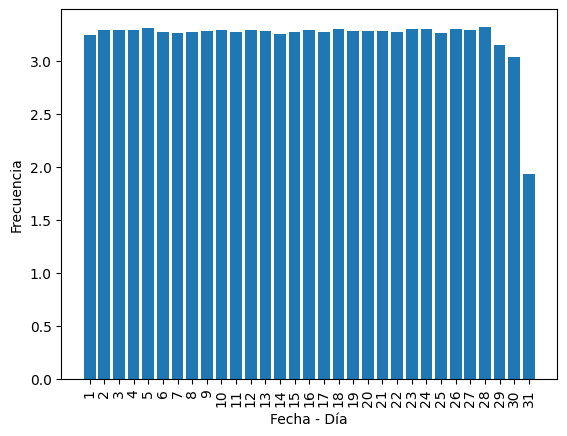

In [ ]:
plt.bar(conteo_fecha["Día"], conteo_fecha["Frecuencia"])
plt.xticks(conteo_fecha["Día"].values)
plt.xlabel(f"Fecha - Día")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Empresa"

conteo = pd.DataFrame(km_df[variable].astype(str).value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(11)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0          A   45322       20.21
1          D   39816       17.76
2          G   28179       12.57
3          J   27285       12.17
4          F   21505        9.59
5          E   20252        9.03
6          B   17194        7.67
7          C   14815        6.61
8          K    8145        3.63
9          H    1094        0.49
10         I     628        0.28

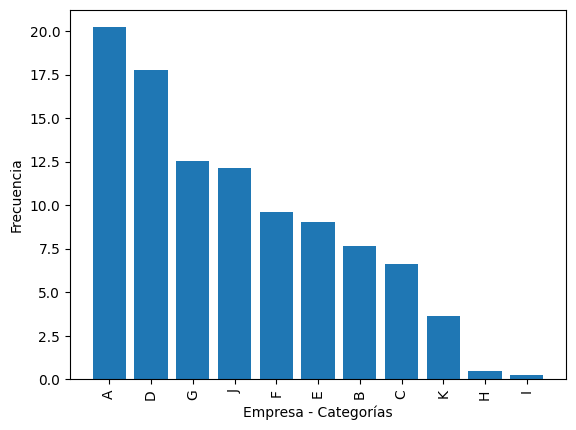

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

In [ ]:
variable = "Ruta"

conteo = pd.DataFrame(km_df[variable].astype(str).value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0     E-149    1001        0.45
1      G-43     824        0.37
2     B-149     790        0.35
3     G-214     739        0.33
4     D-207     739        0.33
5     B-132     739        0.33
6     J-197     739        0.33
7     C-196     739        0.33
8     D-195     739        0.33
9     B-140     739        0.33

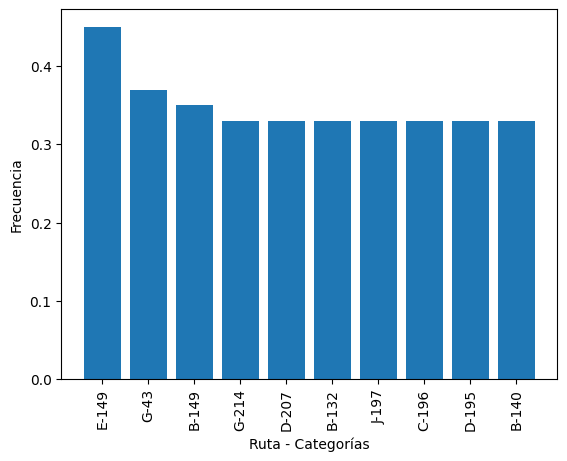

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

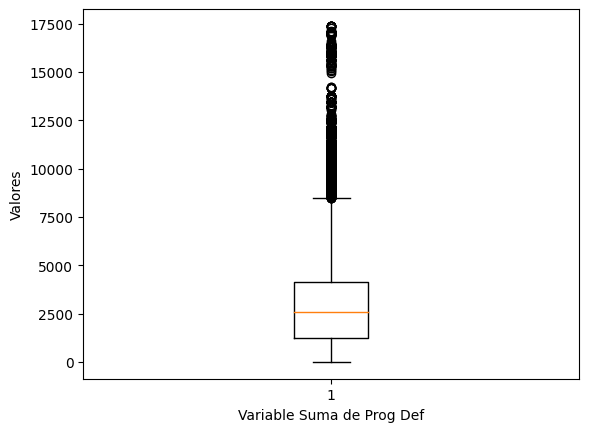

In [ ]:
plt.boxplot(km_df["Suma de Prog Def"].values)
plt.xlabel("Variable Suma de Prog Def")
plt.ylabel("Valores")
plt.show()


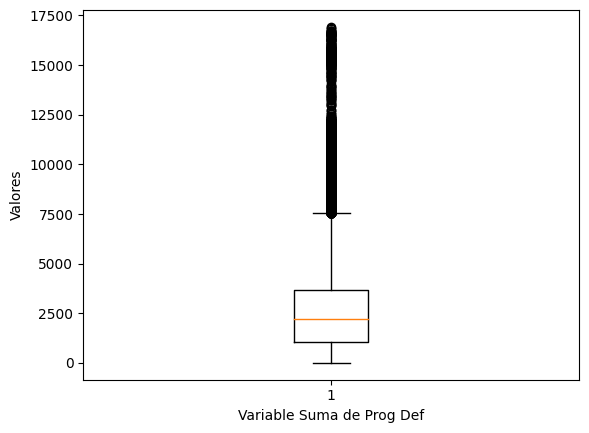

In [ ]:
plt.boxplot(km_df["Suma de Ejecut Def"].values)
plt.xlabel("Variable Suma de Prog Def")
plt.ylabel("Valores")
plt.show()


In [ ]:
km_df.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_15028\3633200771.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  km_df.corr()


Suma de Prog Def  Suma de Ejecut Def
Suma de Prog Def                1.00                0.95
Suma de Ejecut Def              0.95                1.00

In [ ]:
if realizar_analisis_cramer == True:
    print("Cramers entre Empresa y Ruta")
    cramers_v(km_df["Empresa"].values, km_df["Ruta"].values)

### 1.3. Inspección de los dataframe

In [ ]:
km_df

Fecha Empresa   Ruta  Suma de Prog Def  Suma de Ejecut Def
0      2019-07-01       J    J-1           2029.09             1976.61
1      2019-07-02       J    J-1           3819.46             3614.66
2      2019-07-03       J    J-1           3819.46             3727.80
3      2019-07-04       J    J-1           3819.46             3695.85
4      2019-07-05       J    J-1           3819.46             3689.19
...           ...     ...    ...               ...                 ...
224230 2021-06-25       B  B-142            262.00              254.10
224231 2021-06-26       B  B-142            154.51              146.54
224232 2021-06-28       B  B-142            262.00              262.00
224233 2021-06-29       B  B-142            262.00              261.88
224234 2021-06-30       B  B-142            262.00              262.00

[224235 rows x 5 columns]

In [ ]:
infracciones_df.columns

Index(['Id  de la novedad', 'Área', 'Empresa', 'Tipo de novedad',
       'Fecha Novedad', 'Hora Novedad', 'Tipo de concesión',
       'Mecanismo de observación', 'Ruta', 'Dirección', 'Ubicación',
       'Vehículo', 'Conductor', 'Puntos', 'Unidad  de medida', 'Descripción'],
      dtype='object')

In [ ]:
km_df.columns

Index(['Fecha', 'Empresa', 'Ruta', 'Suma de Prog Def', 'Suma de Ejecut Def'], dtype='object')

In [ ]:
infracciones_df.shape

(114124, 16)

In [ ]:
km_df.shape

(224235, 5)

In [ ]:
len(infracciones_df)

114124

In [ ]:
len(km_df)

224235

In [ ]:
infracciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114124 entries, 0 to 114123
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Id  de la novedad         114124 non-null  int64         
 1   Área                      114124 non-null  category      
 2   Empresa                   114124 non-null  category      
 3   Tipo de novedad           114124 non-null  category      
 4   Fecha Novedad             114124 non-null  datetime64[ns]
 5   Hora Novedad              114124 non-null  datetime64[ns]
 6   Tipo de concesión         114124 non-null  category      
 7   Mecanismo de observación  114124 non-null  category      
 8   Ruta                      81614 non-null   category      
 9   Dirección                 81297 non-null   category      
 10  Ubicación                 81297 non-null   category      
 11  Vehículo                  81452 non-null   category      
 12  Co

In [ ]:
km_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224235 entries, 0 to 224234
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Fecha               224235 non-null  datetime64[ns]
 1   Empresa             224235 non-null  object        
 2   Ruta                224235 non-null  object        
 3   Suma de Prog Def    224235 non-null  float64       
 4   Suma de Ejecut Def  224235 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 8.6+ MB


In [ ]:
infracciones_df.describe()

Id  de la novedad    Puntos
count          114124.00 114124.00
mean          7057143.08     14.56
std            327916.63      6.14
min           6078557.00     10.00
25%           7068580.50     10.00
50%           7201686.50     15.00
75%           7253745.50     15.00
max           7300237.00     30.00

In [ ]:
km_df.describe()

Suma de Prog Def  Suma de Ejecut Def
count         224235.00           224235.00
mean            2951.37             2589.09
std             2223.11             2005.97
min                0.00                0.00
25%             1240.50             1065.79
50%             2576.24             2197.56
75%             4142.72             3658.80
max            17391.22            16922.94

In [ ]:
infracciones_df.describe(include=["category"])

Área Empresa Tipo de novedad Tipo de concesión  \
count      114124  114124          114124            114124   
unique          3      12              62                 2   
top     VEHÍCULOS       A           I5025             ZONAL   
freq        47826   31492           27199            113883   

             Mecanismo de observación   Ruta          Dirección  \
count                          114124  81614              81297   
unique                              6    750              29046   
top     Personal Interventoría en Vía  A-411  calle 191 # 45-11   
freq                            79268   9248               2132   

                             Ubicación Vehículo Conductor Unidad  de medida  \
count                            81297    81452     48661            114124   
unique                           11019     6323     14790                 1   
top     4.767781600000016, -74.0243333    G-767     A-859            Puntos   
freq                              4338      499        22            114124   

                                              Descripción  
count                                              114124  
unique                                                 62  
top     Tiempo de atención en vía (cuando se supera el...  
freq                                                27199

In [ ]:
km_df.describe(include=["object"])

Empresa    Ruta
count   224235  224235
unique      11     499
top          A   E-149
freq     45322    1001

## 2. Limpieza de datos

### 2.1. Modificacion de columnas

In [ ]:
infracciones_df.columns

Index(['Id  de la novedad', 'Área', 'Empresa', 'Tipo de novedad',
       'Fecha Novedad', 'Hora Novedad', 'Tipo de concesión',
       'Mecanismo de observación', 'Ruta', 'Dirección', 'Ubicación',
       'Vehículo', 'Conductor', 'Puntos', 'Unidad  de medida', 'Descripción'],
      dtype='object')

In [ ]:
km_df.columns

Index(['Fecha', 'Empresa', 'Ruta', 'Suma de Prog Def', 'Suma de Ejecut Def'], dtype='object')

In [ ]:
nuevas_columnas = ["id","area","empresa","codigo_infraccion","fecha","hora_infraccion","tipo_concesion","mecanismo_observacion","ruta","direccion","ubicacion","vehiculo","conductor","puntos","unidad_medida","descripcion"]
infracciones_df.columns = nuevas_columnas

infracciones_df.columns

Index(['id', 'area', 'empresa', 'codigo_infraccion', 'fecha',
       'hora_infraccion', 'tipo_concesion', 'mecanismo_observacion', 'ruta',
       'direccion', 'ubicacion', 'vehiculo', 'conductor', 'puntos',
       'unidad_medida', 'descripcion'],
      dtype='object')

In [ ]:
nuevas_columnas = ["fecha","empresa","ruta","sum_km_programado","sum_km_ejecutado"]
km_df.columns=nuevas_columnas
km_df.columns

Index(['fecha', 'empresa', 'ruta', 'sum_km_programado', 'sum_km_ejecutado'], dtype='object')

### 2.2. Descartar columnas y datos innecesarios

In [ ]:
infracciones_df = infracciones_df.drop( ["id","unidad_medida","descripcion","direccion","ubicacion", "ruta", "vehiculo", "conductor"] , axis=1  )
infracciones_df

area empresa codigo_infraccion      fecha     hora_infraccion  \
0       OPERACIONES       A           I5023-3 2021-04-03 2023-05-21 00:00:00   
1       OPERACIONES       A           I5023-3 2021-04-03 2023-05-21 00:00:00   
2         SEGURIDAD       A             I8003 2021-04-06 2023-05-21 00:00:00   
3         SEGURIDAD       B             I6019 2021-04-22 2023-05-21 00:00:00   
4         SEGURIDAD       C             I8003 2021-04-30 2023-05-21 00:00:00   
...             ...     ...               ...        ...                 ...   
114119    VEHÍCULOS       F             I5006 2020-12-17 2023-05-21 05:28:00   
114120    VEHÍCULOS       F             I5006 2020-12-17 2023-05-21 04:53:00   
114121    VEHÍCULOS       F             I5006 2020-12-17 2023-05-21 05:19:00   
114122    VEHÍCULOS       F             I5006 2020-12-17 2023-05-21 05:35:00   
114123    VEHÍCULOS       A             I5006 2020-12-05 2023-05-21 04:38:00   

       tipo_concesion                        mecanismo_observacion  puntos  
0               ZONAL                        Personal Transmilenio      10  
1               ZONAL  Personal de Interventoría CENTRO DE CONTROL      10  
2               ZONAL                            Queja del usuario      30  
3               ZONAL                Personal Interventoría en Vía      15  
4               ZONAL  Personal de Interventoría CENTRO DE CONTROL      30  
...               ...                                          ...     ...  
114119          ZONAL                Personal Interventoría en Vía      10  
114120          ZONAL                Personal Interventoría en Vía      10  
114121          ZONAL                Personal Interventoría en Vía      10  
114122          ZONAL                Personal Interventoría en Vía      10  
114123          ZONAL                Personal Interventoría en Vía      10  

[114124 rows x 8 columns]

In [ ]:
# infracciones_df = infracciones_df[ infracciones_df ["codigo_infraccion"]=='I5025'	]
# infracciones_df

## 3. Procesamiento

### 3.1. Creación de dataframe final 'desempenio_sitp_df'

In [ ]:
infracciones_por_mes = infracciones_df.groupby([
    "empresa", 
    infracciones_df["fecha"].dt.year, 
    infracciones_df["fecha"].dt.month, 
    # infracciones_df["fecha"].dt.week # Semana del año
    infracciones_df["fecha"].dt.strftime('%U') # Semana del año
    ]).sum()

infracciones_por_mes.index = infracciones_por_mes.index.rename(["empresa", "anio", "mes", "semana"])
infracciones_por_mes = infracciones_por_mes.reset_index()
infracciones_por_mes = infracciones_por_mes[infracciones_por_mes["puntos"] > 0]
infracciones_por_mes

C:\Users\Acer\AppData\Local\Temp\ipykernel_15028\2402177717.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]).sum()


empresa  anio  mes semana  puntos
0           A  2019    1     00    2675
1           A  2019    1     01    4850
2           A  2019    1     02    5135
3           A  2019    1     03    5150
4           A  2019    1     04    3475
...       ...   ...  ...    ...     ...
21221       L  2019    5     21     385
21274       L  2019    6     21     105
21275       L  2019    6     22     570
21276       L  2019    6     23     485
21277       L  2019    6     24     100

[1457 rows x 5 columns]

In [ ]:
km_por_mes = km_df.groupby([
    "empresa", 
    km_df["fecha"].dt.year, 
    km_df["fecha"].dt.month, 
    # km_df["fecha"].dt.week, 
    km_df["fecha"].dt.strftime('%U') # Semana del año
    ]).sum()

km_por_mes.index = km_por_mes.index.rename(["empresa", "anio", "mes", "semana"])
km_por_mes = km_por_mes.reset_index()
km_por_mes

C:\Users\Acer\AppData\Local\Temp\ipykernel_15028\3795203272.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]).sum()


empresa  anio  mes semana  sum_km_programado  sum_km_ejecutado
0          A  2019    7     26         1206271.47         814873.67
1          A  2019    7     27         1475186.47         982996.89
2          A  2019    7     28         1485290.61         951557.61
3          A  2019    7     29         1484716.39         976927.94
4          A  2019    7     30          822206.66         543663.61
...      ...   ...  ...    ...                ...               ...
1172       K  2021    6     22          152499.30         132200.72
1173       K  2021    6     23          190107.69         165425.96
1174       K  2021    6     24          189828.05         168602.62
1175       K  2021    6     25          203081.72         185301.39
1176       K  2021    6     26          114591.15         104907.94

[1177 rows x 6 columns]

In [ ]:
desempenio_sitp_df = pd.merge(km_por_mes, infracciones_por_mes, how="right", on=["empresa","anio", "mes", "semana"])
desempenio_sitp_df.dropna(inplace=True)
desempenio_sitp_df.columns = ["Empresa", "Año", "Mes", "Numero Semana", "Total Km Prog_Semana", "Total Km Ejecut_Semana", "Total Puntos_Semana"]
desempenio_sitp_df = desempenio_sitp_df[(desempenio_sitp_df["Total Km Prog_Semana"] > 0)]
desempenio_sitp_df = desempenio_sitp_df[(desempenio_sitp_df["Total Km Ejecut_Semana"] > 0)]
desempenio_sitp_df

Empresa   Año  Mes Numero Semana  Total Km Prog_Semana  \
32         A  2019    7            26            1206271.47   
33         A  2019    7            27            1475186.47   
34         A  2019    7            28            1485290.61   
35         A  2019    7            29            1484716.39   
36         A  2019    7            30             822206.66   
...      ...   ...  ...           ...                   ...   
1422       K  2021    5            21             170386.81   
1423       K  2021    6            22             152499.30   
1424       K  2021    6            23             190107.69   
1425       K  2021    6            24             189828.05   
1426       K  2021    6            25             203081.72   

      Total Km Ejecut_Semana  Total Puntos_Semana  
32                 814873.67                 4670  
33                 982996.89                 4775  
34                 951557.61                 5680  
35                 976927.94                 5425  
36                 543663.61                 3380  
...                      ...                  ...  
1422               147619.62                  105  
1423               132200.72                   45  
1424               165425.96                   15  
1425               168602.62                  115  
1426               185301.39                   45  

[1140 rows x 7 columns]

In [ ]:
desempenio_sitp_df["ICO"] = (desempenio_sitp_df["Total Puntos_Semana"]*10000) / desempenio_sitp_df["Total Km Ejecut_Semana"]
desempenio_sitp_df["ICK"] = (desempenio_sitp_df["Total Km Ejecut_Semana"] / desempenio_sitp_df["Total Km Prog_Semana"]) * 100

desempenio_sitp_df

Empresa   Año  Mes Numero Semana  Total Km Prog_Semana  \
32         A  2019    7            26            1206271.47   
33         A  2019    7            27            1475186.47   
34         A  2019    7            28            1485290.61   
35         A  2019    7            29            1484716.39   
36         A  2019    7            30             822206.66   
...      ...   ...  ...           ...                   ...   
1422       K  2021    5            21             170386.81   
1423       K  2021    6            22             152499.30   
1424       K  2021    6            23             190107.69   
1425       K  2021    6            24             189828.05   
1426       K  2021    6            25             203081.72   

      Total Km Ejecut_Semana  Total Puntos_Semana   ICO   ICK  
32                 814873.67                 4670 57.31 67.55  
33                 982996.89                 4775 48.58 66.64  
34                 951557.61                 5680 59.69 64.07  
35                 976927.94                 5425 55.53 65.80  
36                 543663.61                 3380 62.17 66.12  
...                      ...                  ...   ...   ...  
1422               147619.62                  105  7.11 86.64  
1423               132200.72                   45  3.40 86.69  
1424               165425.96                   15  0.91 87.02  
1425               168602.62                  115  6.82 88.82  
1426               185301.39                   45  2.43 91.24  

[1140 rows x 9 columns]

In [ ]:
desempenio_sitp_df[desempenio_sitp_df["ICO"] > 300]

Empty DataFrame
Columns: [Empresa, Año, Mes, Numero Semana, Total Km Prog_Semana, Total Km Ejecut_Semana, Total Puntos_Semana, ICO, ICK]
Index: []

In [ ]:
desempenio_sitp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 32 to 1426
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Empresa                 1140 non-null   object 
 1   Año                     1140 non-null   int64  
 2   Mes                     1140 non-null   int64  
 3   Numero Semana           1140 non-null   object 
 4   Total Km Prog_Semana    1140 non-null   float64
 5   Total Km Ejecut_Semana  1140 non-null   float64
 6   Total Puntos_Semana     1140 non-null   int64  
 7   ICO                     1140 non-null   float64
 8   ICK                     1140 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 89.1+ KB


### 3.2. Perfilado dataframe 'desempenio_sitp_df'

In [ ]:
reporte = ProfileReport(desempenio_sitp_df)
reporte

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
%matplotlib inline

In [ ]:
desempenio_sitp_df.columns

Index(['Empresa', 'Año', 'Mes', 'Numero Semana', 'Total Km Prog_Semana',
       'Total Km Ejecut_Semana', 'Total Puntos_Semana', 'ICO', 'ICK'],
      dtype='object')

In [ ]:
variable = "Empresa"

conteo = pd.DataFrame(desempenio_sitp_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0         D     123       10.79
1         E     123       10.79
2         G     123       10.79
3         J     123       10.79
4         A     122       10.70
5         F     122       10.70
6         B     121       10.61
7         C     120       10.53
8         K     116       10.18
9         H      26        2.28

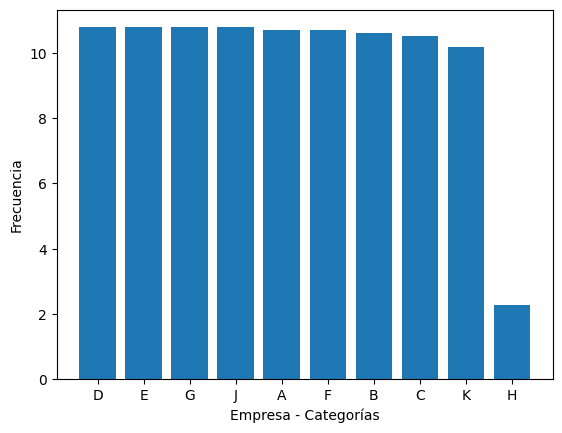

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
variable = "Año"

conteo = pd.DataFrame(desempenio_sitp_df[variable].value_counts())
conteo["Frecuencia"] = (conteo[variable] / conteo[variable].sum() * 100).round(2)
conteo = conteo.head(10)
conteo.reset_index(inplace=True)
conteo.columns = ["Categoría", "Conteo", "Frecuencia"]
conteo

Categoría  Conteo  Frecuencia
0       2020     549       48.16
1       2021     321       28.16
2       2019     270       23.68

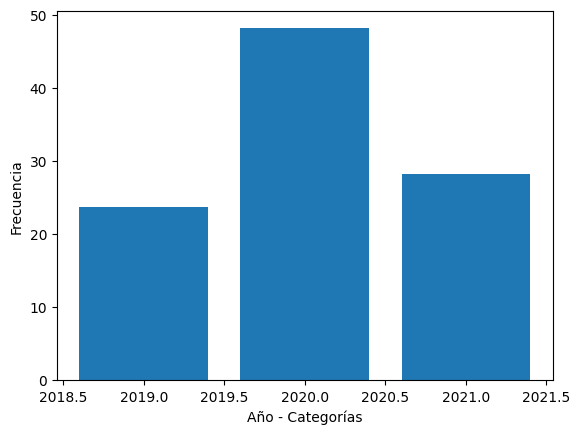

In [ ]:
plt.bar(conteo["Categoría"], conteo["Frecuencia"])
plt.xlabel(f"{variable} - Categorías")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
frecuencia_empresa_año = desempenio_sitp_df.groupby(["Empresa", "Año"]).size().to_frame()
frecuencia_empresa_año

0
Empresa Año     
A       2019  30
        2020  61
        2021  31
B       2019  30
        2020  61
        2021  30
C       2019  30
        2020  60
        2021  30
D       2019  30
        2020  62
        2021  31
E       2019  30
        2020  62
        2021  31
F       2019  30
        2020  61
        2021  31
G       2019  30
        2020  62
        2021  31
H       2021  26
I       2021  21
J       2019  30
        2020  62
        2021  31
K       2019  30
        2020  58
        2021  28

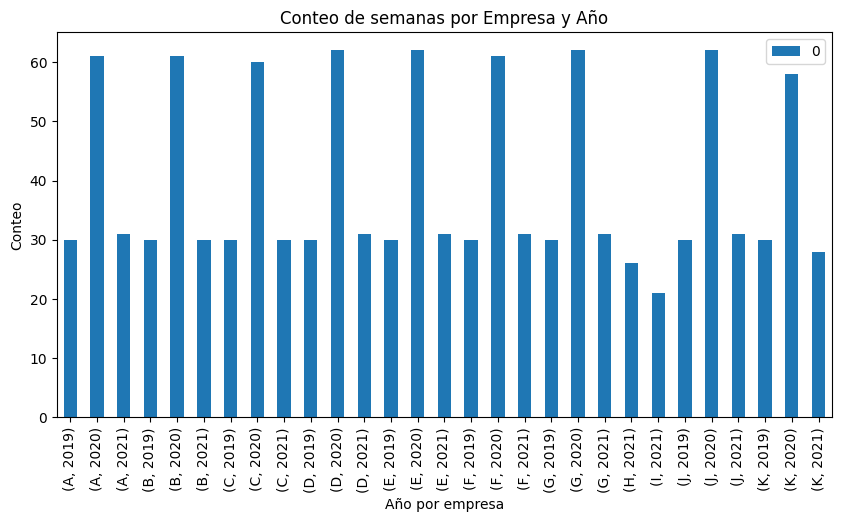

In [ ]:
frecuencia_empresa_año.plot(
    kind="bar",
    title="Conteo de semanas por Empresa y Año",
    ylabel="Conteo",
    xlabel="Año por empresa",
    figsize=(10, 5)
    )

plt.show()

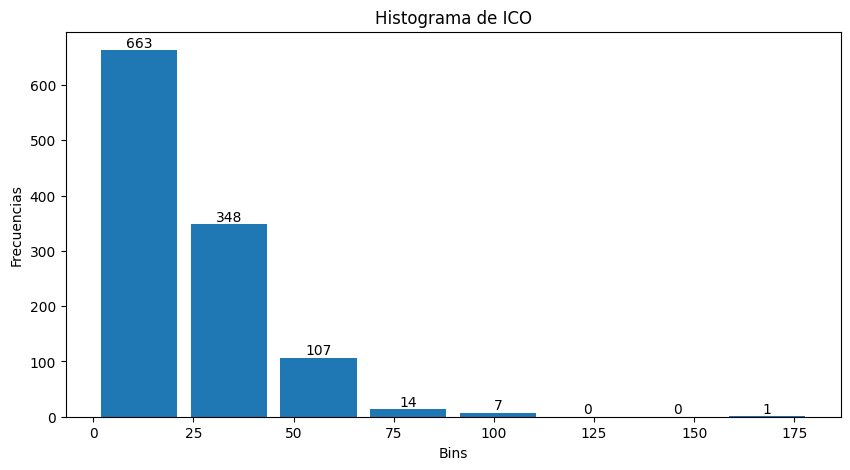

In [ ]:
ico = desempenio_sitp_df["ICO"]
plt.figure(figsize=(10,5))
values, bins, bars = plt.hist(ico, 8, rwidth=0.85)
plt.title("Histograma de ICO")
plt.xlabel("Bins")
plt.ylabel("Frecuencias")
plt.bar_label(bars)
plt.show()

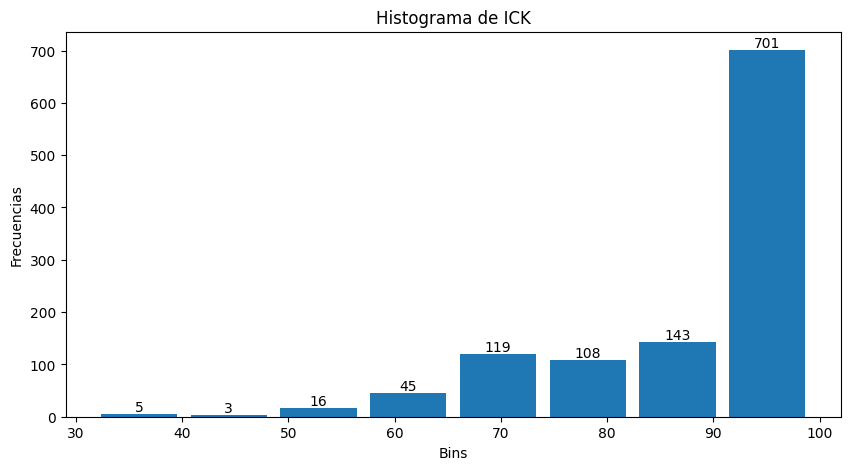

In [ ]:
ick = desempenio_sitp_df["ICK"]
plt.figure(figsize=(10,5))
values, bins, bars = plt.hist(ick, 8, rwidth=0.85)
plt.title("Histograma de ICK")
plt.xlabel("Bins")
plt.ylabel("Frecuencias")
plt.bar_label(bars)
plt.show()


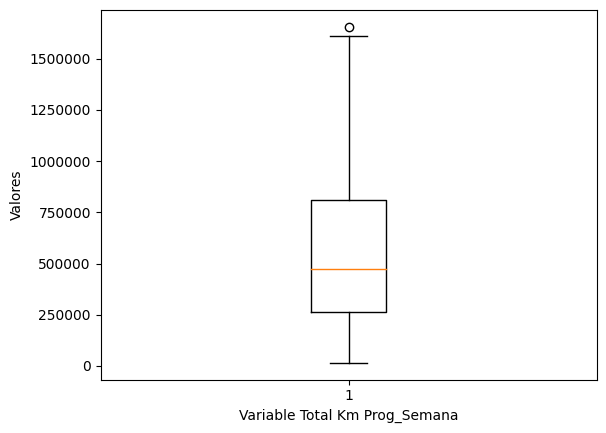

In [ ]:
plt.boxplot(desempenio_sitp_df["Total Km Prog_Semana"].values)
plt.xlabel("Variable Total Km Prog_Semana")
plt.ylabel("Valores")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

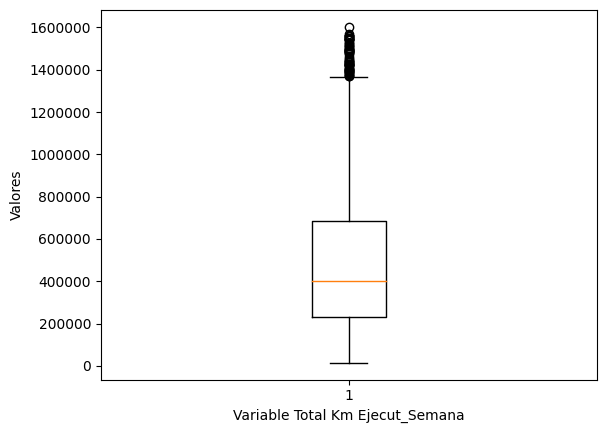

In [ ]:
plt.boxplot(desempenio_sitp_df["Total Km Ejecut_Semana"].values)
plt.xlabel("Variable Total Km Ejecut_Semana")
plt.ylabel("Valores")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

### 3.3. Graficos de serie temporal

In [ ]:
sns.set_theme()

In [ ]:
desempenio_sitp_df.index = pd.to_datetime(desempenio_sitp_df["Año"].astype(str) + "-" + desempenio_sitp_df["Mes"].astype(str))
desempenio_sitp_df.index = pd.to_datetime(desempenio_sitp_df.index)

desempenio_sitp_df


Empresa   Año  Mes Numero Semana  Total Km Prog_Semana  \
2019-07-01       A  2019    7            26            1206271.47   
2019-07-01       A  2019    7            27            1475186.47   
2019-07-01       A  2019    7            28            1485290.61   
2019-07-01       A  2019    7            29            1484716.39   
2019-07-01       A  2019    7            30             822206.66   
...            ...   ...  ...           ...                   ...   
2021-05-01       K  2021    5            21             170386.81   
2021-06-01       K  2021    6            22             152499.30   
2021-06-01       K  2021    6            23             190107.69   
2021-06-01       K  2021    6            24             189828.05   
2021-06-01       K  2021    6            25             203081.72   

            Total Km Ejecut_Semana  Total Puntos_Semana   ICO   ICK  
2019-07-01               814873.67                 4670 57.31 67.55  
2019-07-01               982996.89                 4775 48.58 66.64  
2019-07-01               951557.61                 5680 59.69 64.07  
2019-07-01               976927.94                 5425 55.53 65.80  
2019-07-01               543663.61                 3380 62.17 66.12  
...                            ...                  ...   ...   ...  
2021-05-01               147619.62                  105  7.11 86.64  
2021-06-01               132200.72                   45  3.40 86.69  
2021-06-01               165425.96                   15  0.91 87.02  
2021-06-01               168602.62                  115  6.82 88.82  
2021-06-01               185301.39                   45  2.43 91.24  

[1140 rows x 9 columns]

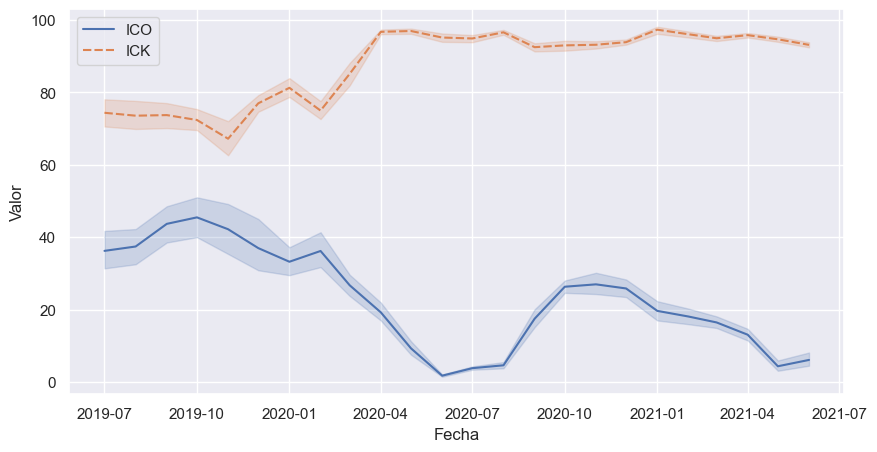

In [ ]:
serie_temp = desempenio_sitp_df[["ICO", "ICK"]]

plt.figure(figsize=(10, 5))
sns.lineplot(data=serie_temp)
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.show()

In [ ]:
# Calcular la media y la desviación estándar de los datos agrupados por fecha
grouped_data = serie_temp[["ICO", "ICK"]].groupby(serie_temp.index.date).agg(['mean', 'std'])
grouped_data.index = pd.to_datetime(grouped_data.index)

# Crear las bandas superior e inferior para cada serie
grouped_data['ICO', 'upper'] = grouped_data['ICO', 'mean'] + grouped_data['ICO', 'std']
grouped_data['ICO', 'lower'] = grouped_data['ICO', 'mean'] - grouped_data['ICO', 'std']
grouped_data['ICK', 'upper'] = grouped_data['ICK', 'mean'] + grouped_data['ICK', 'std']
grouped_data['ICK', 'lower'] = grouped_data['ICK', 'mean'] - grouped_data['ICK', 'std']

fig = go.Figure()

# ICO
fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data['ICO', 'upper'], line=dict(width=0), showlegend=False, mode='lines', name='ICO_upper', fill=None))
fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data['ICO', 'lower'], line=dict(width=0), showlegend=False, mode='lines', name='ICO_lower', fill='tonexty'))
fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data['ICO', 'mean'], mode='lines', name='ICO'))

# ICK
fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data['ICK', 'upper'], line=dict(width=0), showlegend=False, mode='lines', name='ICK_upper', fill=None))
fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data['ICK', 'lower'], line=dict(width=0), showlegend=False, mode='lines', name='ICK_lower', fill='tonexty'))
fig.add_trace(go.Scatter(x=grouped_data.index, y=grouped_data['ICK', 'mean'], mode='lines', name='ICK'))

fig.update_layout(title='Series Temporales ICO e ICK con Bandas', xaxis_title='Tiempo', yaxis_title='Valores', legend_title='Series', width=1000, height=500)

fig.show()

In [ ]:
data_ico_ick = serie_temp
data_ico_ick

ICO   ICK
2019-07-01 57.31 67.55
2019-07-01 48.58 66.64
2019-07-01 59.69 64.07
2019-07-01 55.53 65.80
2019-07-01 62.17 66.12
...          ...   ...
2021-05-01  7.11 86.64
2021-06-01  3.40 86.69
2021-06-01  0.91 87.02
2021-06-01  6.82 88.82
2021-06-01  2.43 91.24

[1140 rows x 2 columns]

### 3.4. Clasificación no supervisada (K-Means)

In [ ]:
data_scaled = data_ico_ick.values
data_scaled

array([[57.30949714, 67.55309102],
       [48.57594207, 66.63543307],
       [59.69160405, 64.06541603],
       ...,
       [ 0.90675008, 87.01697241],
       [ 6.82077195, 88.81860265],
       [ 2.42847612, 91.24474108]])

c:\ProgramData\Anaconda3\envs\nidian\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

c:\ProgramData\Anaconda3\envs\nidian\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

c:\ProgramData\Anaconda3\envs\nidian\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

c:\ProgramData\Anaconda3\envs\nidian\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Wi

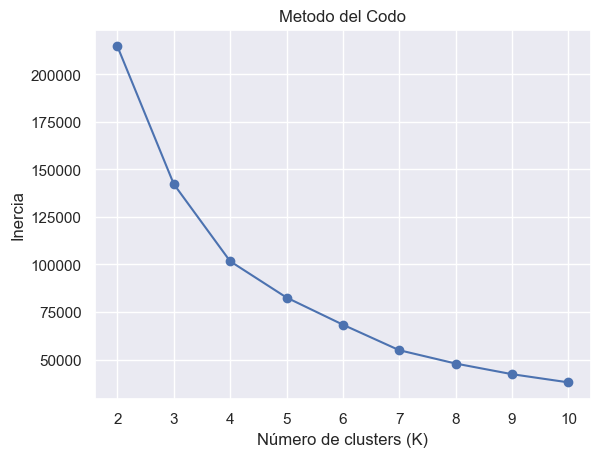

In [ ]:

# Método del codo
inertias = []
ks = list(range(2, 11))

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, '-o')
plt.title("Metodo del Codo")
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.show()


c:\ProgramData\Anaconda3\envs\nidian\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

c:\ProgramData\Anaconda3\envs\nidian\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

c:\ProgramData\Anaconda3\envs\nidian\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

c:\ProgramData\Anaconda3\envs\nidian\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Wi

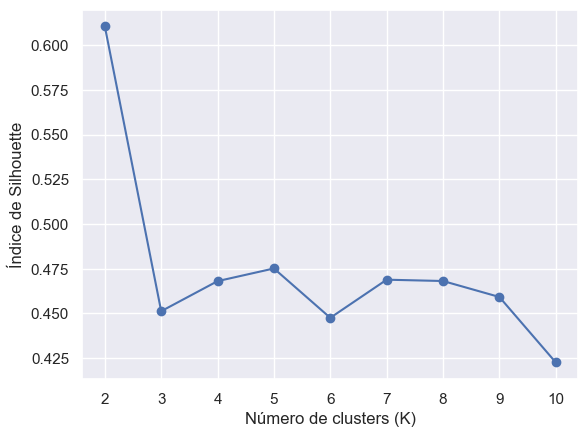

In [ ]:

# Índice de Silhouette
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    sil_score = silhouette_score(data_scaled, labels)
    sil_scores.append(sil_score)

plt.plot(range(2, 11), sil_scores, '-o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [ ]:
K_elegidos = 4

In [ ]:
kmeans = KMeans(n_clusters=K_elegidos, n_init=10)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

cluster_labels

c:\ProgramData\Anaconda3\envs\nidian\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



array([3, 1, 3, ..., 0, 0, 0])

In [ ]:
# Asignar etiquetas de clusters al DataFrame original
desempenio_sitp_df['Cluster'] = cluster_labels
desempenio_sitp_df

Empresa   Año  Mes Numero Semana  Total Km Prog_Semana  \
2019-07-01       A  2019    7            26            1206271.47   
2019-07-01       A  2019    7            27            1475186.47   
2019-07-01       A  2019    7            28            1485290.61   
2019-07-01       A  2019    7            29            1484716.39   
2019-07-01       A  2019    7            30             822206.66   
...            ...   ...  ...           ...                   ...   
2021-05-01       K  2021    5            21             170386.81   
2021-06-01       K  2021    6            22             152499.30   
2021-06-01       K  2021    6            23             190107.69   
2021-06-01       K  2021    6            24             189828.05   
2021-06-01       K  2021    6            25             203081.72   

            Total Km Ejecut_Semana  Total Puntos_Semana   ICO   ICK  Cluster  
2019-07-01               814873.67                 4670 57.31 67.55        3  
2019-07-01               982996.89                 4775 48.58 66.64        1  
2019-07-01               951557.61                 5680 59.69 64.07        3  
2019-07-01               976927.94                 5425 55.53 65.80        3  
2019-07-01               543663.61                 3380 62.17 66.12        3  
...                            ...                  ...   ...   ...      ...  
2021-05-01               147619.62                  105  7.11 86.64        0  
2021-06-01               132200.72                   45  3.40 86.69        0  
2021-06-01               165425.96                   15  0.91 87.02        0  
2021-06-01               168602.62                  115  6.82 88.82        0  
2021-06-01               185301.39                   45  2.43 91.24        0  

[1140 rows x 10 columns]

In [ ]:
desempenio_sitp_df['Cluster'] = desempenio_sitp_df['Cluster'].map({
    0:"G1",
    1:"G2",
    2:"G3",
    3:"G4",
    4:"G5",
    5:"G6",
    6:"G7",
    7:"G8",
    8:"G9",
    9:"G10",
    10:"G11",
    11:"G12",
})

desempenio_sitp_df

Empresa   Año  Mes Numero Semana  Total Km Prog_Semana  \
2019-07-01       A  2019    7            26            1206271.47   
2019-07-01       A  2019    7            27            1475186.47   
2019-07-01       A  2019    7            28            1485290.61   
2019-07-01       A  2019    7            29            1484716.39   
2019-07-01       A  2019    7            30             822206.66   
...            ...   ...  ...           ...                   ...   
2021-05-01       K  2021    5            21             170386.81   
2021-06-01       K  2021    6            22             152499.30   
2021-06-01       K  2021    6            23             190107.69   
2021-06-01       K  2021    6            24             189828.05   
2021-06-01       K  2021    6            25             203081.72   

            Total Km Ejecut_Semana  Total Puntos_Semana   ICO   ICK Cluster  
2019-07-01               814873.67                 4670 57.31 67.55      G4  
2019-07-01               982996.89                 4775 48.58 66.64      G2  
2019-07-01               951557.61                 5680 59.69 64.07      G4  
2019-07-01               976927.94                 5425 55.53 65.80      G4  
2019-07-01               543663.61                 3380 62.17 66.12      G4  
...                            ...                  ...   ...   ...     ...  
2021-05-01               147619.62                  105  7.11 86.64      G1  
2021-06-01               132200.72                   45  3.40 86.69      G1  
2021-06-01               165425.96                   15  0.91 87.02      G1  
2021-06-01               168602.62                  115  6.82 88.82      G1  
2021-06-01               185301.39                   45  2.43 91.24      G1  

[1140 rows x 10 columns]

#### 3.4.1. Estadisticos de los clusters

In [ ]:
# Estadísticas descriptivas por cluster
desempenio_sitp_df.groupby('Cluster').describe().transpose()

Cluster                              G1         G2         G3         G4
Año                    count     391.00     184.00     469.00      96.00
                       mean     2020.43    2019.41    2020.15    2019.17
                       std         0.52       0.49       0.68       0.37
                       min      2019.00    2019.00    2019.00    2019.00
                       25%      2020.00    2019.00    2020.00    2019.00
                       50%      2020.00    2019.00    2020.00    2019.00
                       75%      2021.00    2020.00    2021.00    2019.00
                       max      2021.00    2020.00    2021.00    2020.00
Mes                    count     391.00     184.00     469.00      96.00
                       mean        5.59       6.70       6.45       8.29
                       std         2.02       4.05       3.98       3.18
                       min         1.00       1.00       1.00       1.00
                       25%         4.00       2.00       3.00       7.75
                       50%         6.00       8.00       7.00       9.00
                       75%         7.00      10.00      10.00      10.25
                       max        12.00      12.00      12.00      12.00
Total Km Prog_Semana   count     391.00     184.00     469.00      96.00
                       mean   519998.68  534739.43  605171.96  777506.31
                       std    388695.79  284873.18  426914.41  446039.15
                       min     30763.65   29199.09   15264.88   44314.01
                       25%    200942.91  290473.76  274558.71  493852.69
                       50%    439348.57  495594.04  465134.16  602989.51
                       75%    749708.39  710272.60  839591.77 1306337.20
                       max   1587830.82 1568410.36 1656253.57 1507684.41
Total Km Ejecut_Semana count     391.00     184.00     469.00      96.00
                       mean   496601.95  380088.72  568739.24  501887.42
                       std    378887.26  197282.26  410808.41  314997.71
                       min     29413.26   21761.29   14528.22   41102.17
                       25%    192992.71  214778.81  258273.35  289973.74
                       50%    412057.47  348090.24  424425.93  353849.27
                       75%    702203.39  530872.32  782966.99  885829.78
                       max   1566948.86  982996.89 1602839.26 1031232.89
Total Puntos_Semana    count     391.00     184.00     469.00      96.00
                       mean      264.05    1334.89    1236.38    3106.72
                       std       302.73     748.71     861.32    1859.99
                       min        10.00      70.00      35.00     250.00
                       25%        70.00     812.50     555.00    1818.75
                       50%       160.00    1292.50    1010.00    2385.00
                       75%       335.00    1682.50    1810.00    5018.75
                       max      1895.00    4775.00    4160.00    7165.00
ICO                    count     391.00     184.00     469.00      96.00
                       mean        5.59      35.66      22.81      64.49
                       std         4.00       8.28       6.26      16.50
                       min         0.20      13.21      13.14      48.07
                       25%         2.38      29.78      17.84      55.59
                       50%         4.25      35.09      21.45      60.18
                       75%         8.35      42.56      26.18      67.08
                       max        14.40      55.95      48.45     179.46
ICK                    count     391.00     184.00     469.00      96.00
                       mean       95.02      72.23      93.41      64.20
                       std         3.67       7.90       5.14      10.07
                       min        72.87      42.28      78.83      31.72
                       25%        93.57      67.94      90.96      59.29
                       50%        96.05      72.18      95

#### 3.4.2. Graficos de los clusters

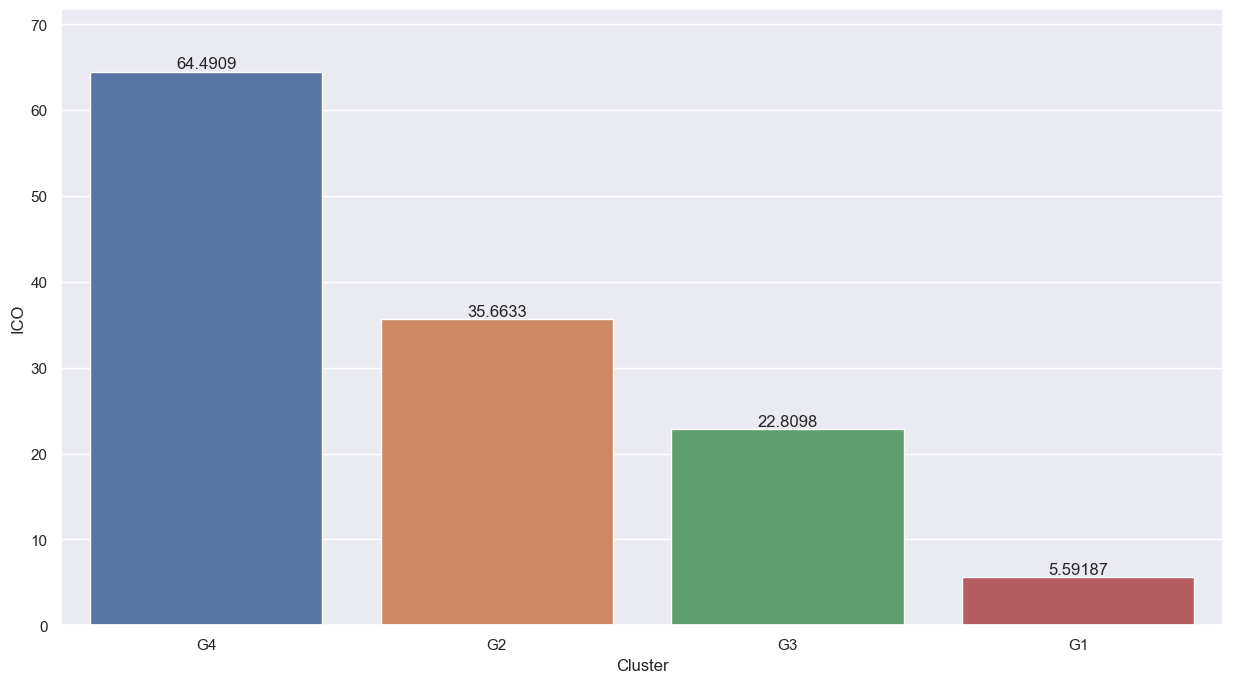

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=desempenio_sitp_df, x="Cluster", y="ICO", errwidth=0)
ax.bar_label(ax.containers[0])
plt.show()

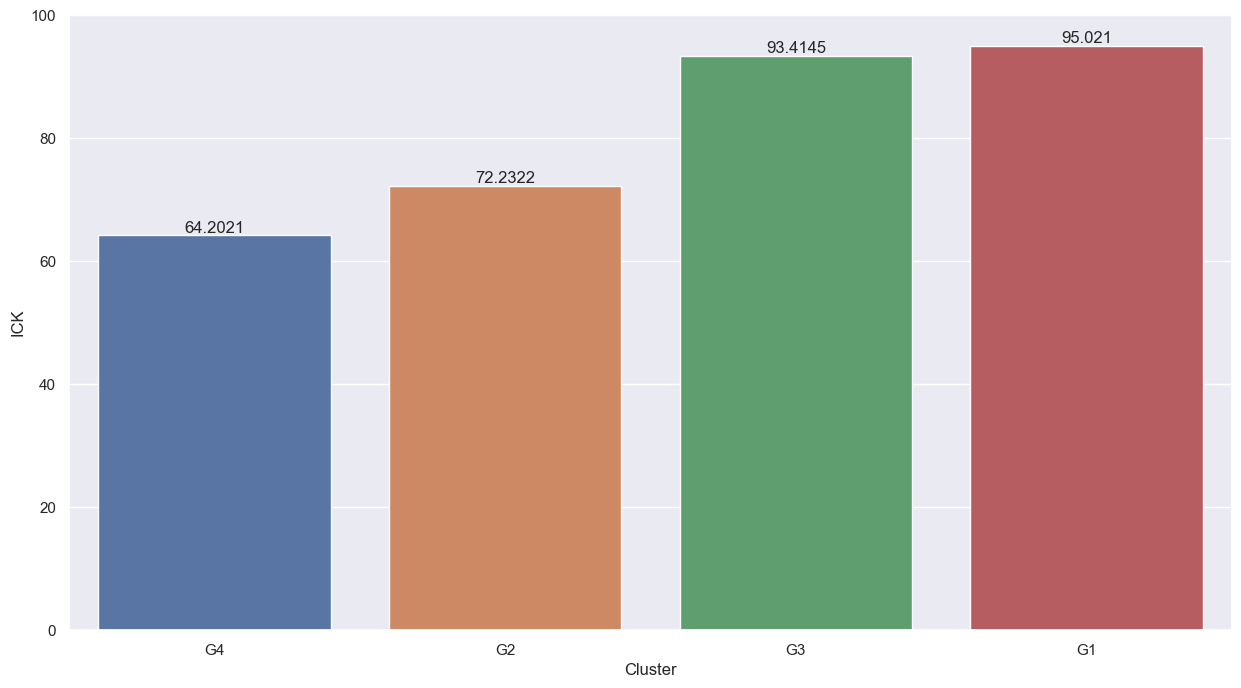

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=desempenio_sitp_df, x="Cluster", y="ICK", errwidth=0)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
centroides = kmeans.cluster_centers_
centroides = pd.DataFrame(centroides, columns=["ICO", "ICK"])
centroides["Cluster"] = [f"G{i}" for i in range(1, len(kmeans.cluster_centers_) + 1)]
centroides

ICO   ICK Cluster
0  5.57 95.04      G1
1 35.66 72.23      G2
2 22.79 93.40      G3
3 64.49 64.20      G4

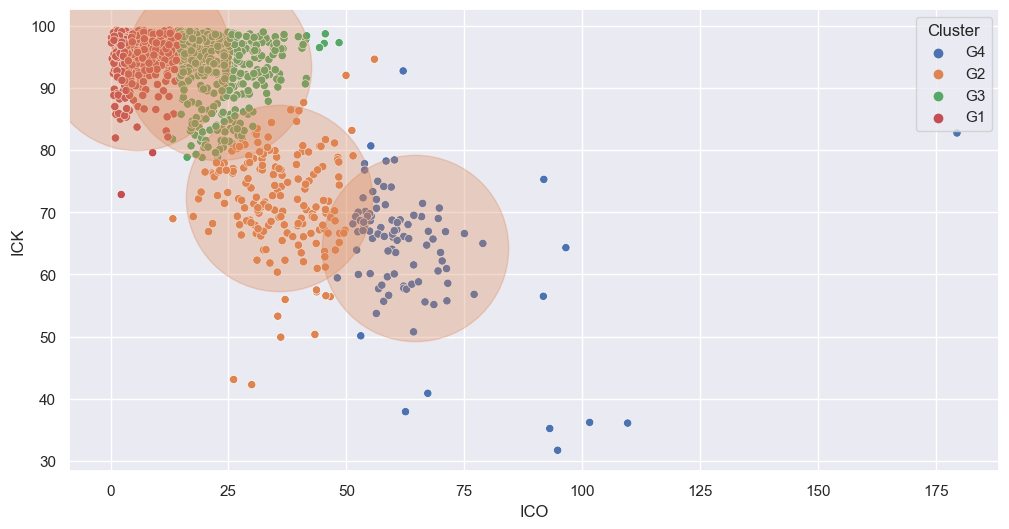

In [ ]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=desempenio_sitp_df, x="ICO", y="ICK", hue="Cluster")
plt.scatter(data=centroides, x="ICO", y="ICK", s = 18000, alpha=0.30)
plt.show()

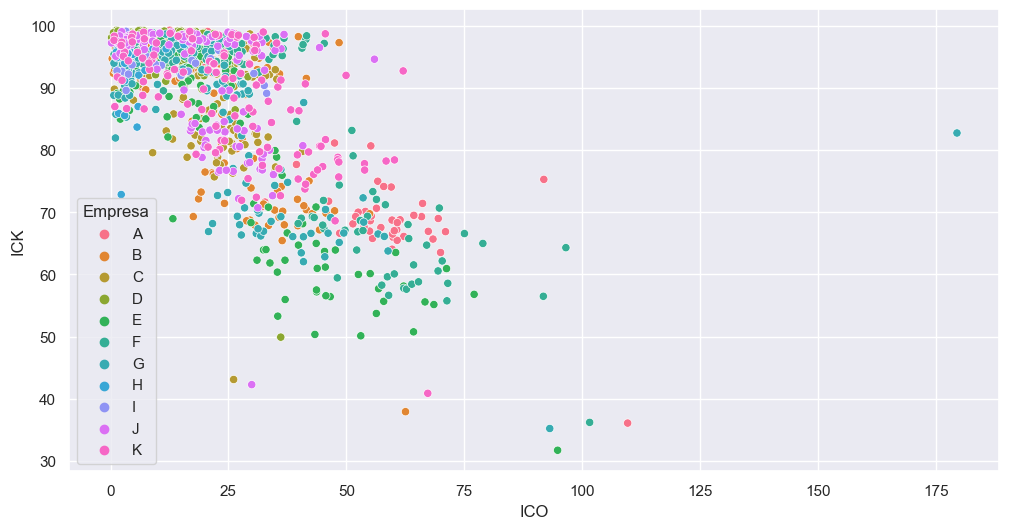

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=desempenio_sitp_df, x="ICO", y="ICK", hue="Empresa")
plt.show()

In [ ]:
# melt the dataset to convert it to long format
data_melt = pd.melt(desempenio_sitp_df[["Total Km Prog_Semana", "Total Km Ejecut_Semana", "Cluster"]], id_vars=['Cluster'], var_name='variable')
data_melt

Cluster                variable      value
0         G4    Total Km Prog_Semana 1206271.47
1         G2    Total Km Prog_Semana 1475186.47
2         G4    Total Km Prog_Semana 1485290.61
3         G4    Total Km Prog_Semana 1484716.39
4         G4    Total Km Prog_Semana  822206.66
...      ...                     ...        ...
2275      G1  Total Km Ejecut_Semana  147619.62
2276      G1  Total Km Ejecut_Semana  132200.72
2277      G1  Total Km Ejecut_Semana  165425.96
2278      G1  Total Km Ejecut_Semana  168602.62
2279      G1  Total Km Ejecut_Semana  185301.39

[2280 rows x 3 columns]

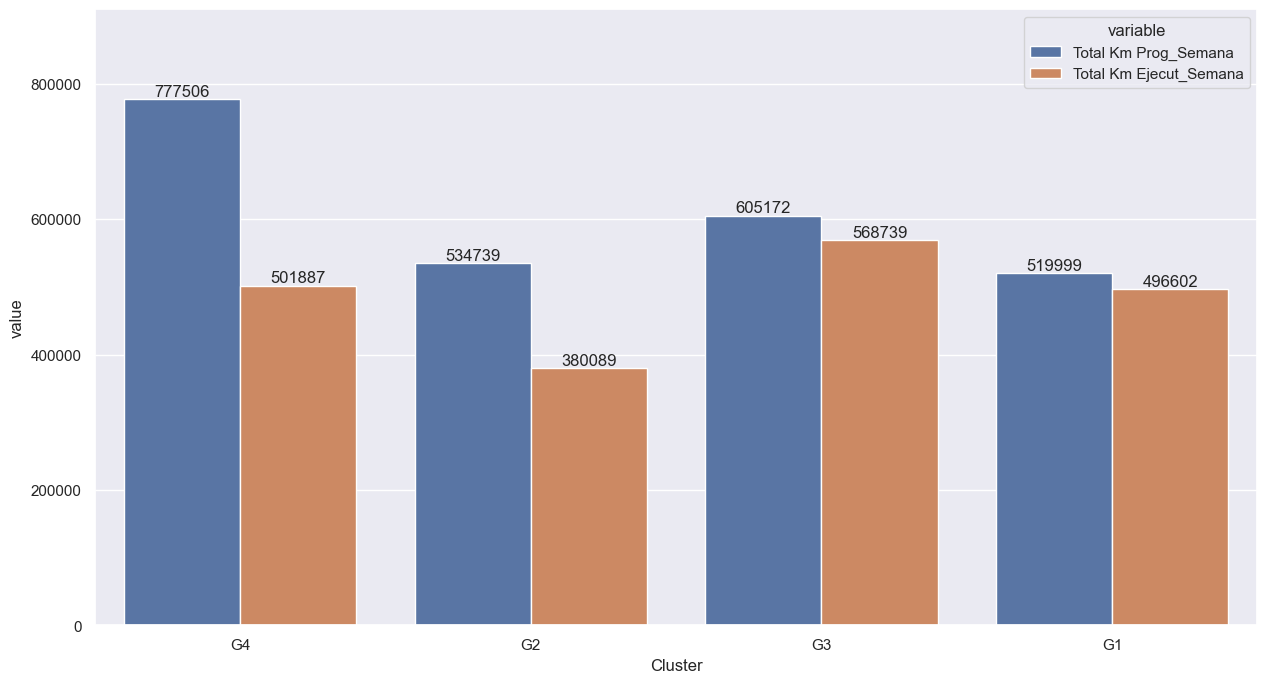

In [ ]:
# create a bar plot with multiple variables
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Cluster', y='value', hue='variable', data=data_melt, errwidth=0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()